# Data Cleaning

### Reading the Data

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import seaborn as sns
import plotly.express as px
import pickle as pkl

dataset = "male_players (legacy)_23"
# dataset = "female_players_23"
df = pd.read_csv('Data/'+dataset+'.csv')
print(len(df))

181361


C:\Users\DELL\AppData\Local\Temp\ipykernel_14552\360946562.py:11: DtypeWarning: Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Data/'+dataset+'.csv')


### Taking a look at the dataset

In [47]:
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,...,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,...,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,...,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,...,61+3,61+3,63+3,60+3,56+3,56+3,56+3,60+3,20+3,https://cdn.sofifa.net/players/227/310/23_120.png
4,227246,/player/227246/lucy-bronze/230009,23,9,2023-01-13,L. Bronze,Lucia Roberta Tough Bronze,RB,89,89,...,86+3,86+3,87+2,87+2,87+2,87+2,87+2,87+2,20+3,https://cdn.sofifa.net/players/227/246/23_120.png


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181361 entries, 0 to 181360
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 152.2+ MB


### Handling Nulls

<Axes: >

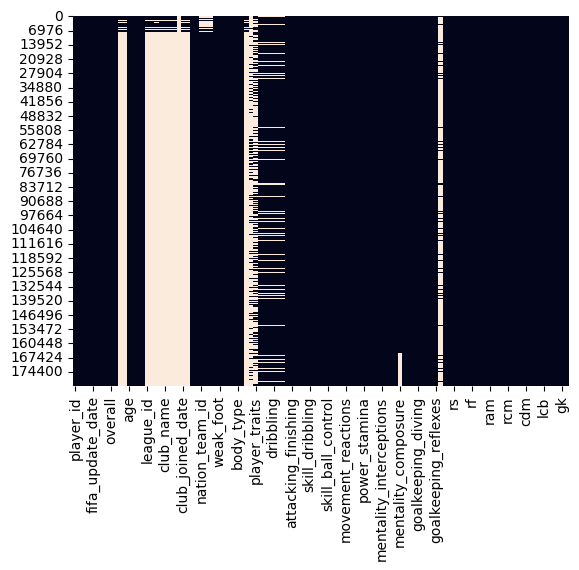

In [49]:
sns.heatmap(df.isnull(), cbar = False)
# Data has lots of missing values

In [50]:
# Total number of nulls = 1218702 in male_players (legacy)_23.csv
# Total number of nulls = 2883528 in female_players_23.csv
df.isnull().sum().sum()

2883528

In [51]:
# Nulls in each column
nulls = df.isnull().sum() 
print(nulls[nulls > 0])

value_eur                         176530
wage_eur                          176530
league_id                         176485
league_name                       176485
league_level                      176576
club_team_id                      176485
club_name                         176485
club_position                     176485
club_jersey_number                176485
club_loaned_from                  181280
club_joined_date                  176657
club_contract_valid_until_year    176576
nation_team_id                      3997
nation_position                     3997
nation_jersey_number                3997
release_clause_eur                176611
player_tags                       151198
player_traits                     109593
pace                               22741
shooting                           22741
passing                            22741
dribbling                          22741
defending                          22741
physic                             22741
mentality_compos

In [52]:
# Showing it as percentages
print(nulls[nulls > 0] / len(df) * 100)

value_eur                         97.336252
wage_eur                          97.336252
league_id                         97.311440
league_name                       97.311440
league_level                      97.361616
club_team_id                      97.311440
club_name                         97.311440
club_position                     97.311440
club_jersey_number                97.311440
club_loaned_from                  99.955338
club_joined_date                  97.406278
club_contract_valid_until_year    97.361616
nation_team_id                     2.203892
nation_position                    2.203892
nation_jersey_number               2.203892
release_clause_eur                97.380914
player_tags                       83.368530
player_traits                     60.428096
pace                              12.539080
shooting                          12.539080
passing                           12.539080
dribbling                         12.539080
defending                       

In [53]:
# Check nulls in pace, shooting, passing, dribbling, defending, physic
# Check if they are the same rows
print("Number of all nulls:", df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1).sum())
# print("Number of rows:",df[df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().all(axis = 1)]['player_positions'].count())
print("Number of any nulls:",df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].iloc[:].isnull().any(axis = 1).sum())
# All of them are null in the same rows. So we could drop them

print("Number of goal keepers:", len(df[df['player_positions'] == 'GK']))
# We notice all of them are goal keepers, except 6 in the case of females
# print those 6
df[(df['player_positions'] != 'GK') & df[['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']].isnull().all(axis=1)][['player_id', 'short_name', 'player_positions', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'overall']]


Number of all nulls: 22741
Number of any nulls: 22741
Number of goal keepers: 22735


,player_id,short_name,player_positions,pace,shooting,passing,dribbling,defending,physic,overall
133481,240714,J. Roord,"CAM, CM",NaN,NaN,NaN,NaN,NaN,NaN,77
133503,240717,L. Beerensteyn,RW,NaN,NaN,NaN,NaN,NaN,NaN,76
133574,240720,R. Jansen,"ST, LW, RW",NaN,NaN,NaN,NaN,NaN,NaN,73
133594,240713,L. van der Most,RB,NaN,NaN,NaN,NaN,NaN,NaN,72
133614,240712,S. van den Bulk,"RB, CB, CDM",NaN,NaN,NaN,NaN,NaN,NaN,71
133641,240721,V. Lewerissa,ST,NaN,NaN,NaN,NaN,NaN,NaN,70


In [54]:
# Handling a few nulls
'''
11.120601 +  88.879399 = 100
'pace' -----> 'goalkeeping_speed'
'shooting' -----> 'goalkeeping_kicking
'passing' -----> 20
'dribbling' -----> 22
'defending' -----> 14
'physic' -----> 64          # mean instead of min, as GK's aren't that bad
'''
# el goalkeepers lyhom scores msh lel la3eeba el tanya, fa hn-merge el 2 columns basically
df['pace'] = df[['pace', 'goalkeeping_speed']].max(axis = 1)
df['shooting'] = df[['shooting', 'goalkeeping_kicking']].max(axis = 1)

# fy 7agat tanya mne2darsh n3mlha merge, fa hna5od el min aw mean 3la asas en el GK msh byb2a gamed fl 7war dh
df['passing'].fillna(df['passing'].min(), inplace = True)
df['dribbling'].fillna(df['dribbling'].min(), inplace = True)
df['defending'].fillna(df['defending'].min(), inplace = True)
df['physic'].fillna(df['physic'].mean(), inplace = True)

In [55]:
# We can't do this before the previous cell, because we use some of the dropped columns to fill the nulls

# Drop columns with more than 33% missing values
# thresh: minimum number of non-NA values to keep the column
df = df.dropna(thresh = 2 * len(df) / 3, axis = 1)
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

nation_team_id          2.203892
nation_position         2.203892
nation_jersey_number    2.203892
pace                    0.003860
mentality_composure     8.823838
dtype: float64


In [56]:
try:
    # Check nulls in 'league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'
    # Check if they are the same rows, msh rows mo5tlfa
    print("Number of all null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
    print("Number of any null rows:", df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
    # tl3 3adad el rows el kolaha null = 3adad el nulls mn kol column fyhom, y3ny nafs el rows
    # All of them are null in the same rows. So we could drop them without losing much data

    # Calculate percentage of nulls in these columns
    # print(df[['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number']].iloc[:].isnull().all(axis = 1).sum() / len(df) * 100)

    # Drop these empty rows
    df = df.dropna(subset = ['league_id',  'league_name',  'club_team_id',  'club_name',  'club_position',  'club_jersey_number'])
except:
    print("Only the male dataset needs this")


Only the male dataset needs this


In [57]:
try:
    # We notice league level has only a few nulls, so we can drop them
    print("Number of nulls in league_level:", df['league_level'].isnull().sum())
    df = df.dropna(subset = ['league_level'])
except:
    print("Only the male dataset needs this")

Only the male dataset needs this


In [58]:
# This has been handled, making this cell obsolete. But it would work for other datasets

# Check nulls in 'gk'
print(df['gk'].isnull().sum())
# Check if there is null in 'gk' and position == goalkeeper
print(df['player_positions'][df['gk'].isnull()].str.contains('GK').sum())
# Some of them are goalkeepers


0
0


In [59]:
# Set df['gk'] nulls to the average of  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'

df.loc[df['gk'].isnull(), 'gk'] = df[df['gk'].isnull()][['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']].mean(axis = 1)

In [60]:
try:
    # See a few rows where 'value_eur' is null
    df[df['value_eur'].isnull()].head()
except:
    print("Only the male dataset needs this")

Only the male dataset needs this


In [61]:
# get the type of columns that have nulls
df.dtypes[nulls[nulls > 0].index]

nation_team_id          float64
nation_position          object
nation_jersey_number    float64
pace                    float64
mentality_composure     float64
dtype: object

In [62]:
try:
    # Taking a look at some players
    df['value_eur'].describe()

    # get player with max value
    # df[df['value_eur'] == df['value_eur'].max()]

    # get 5 players with max value
    df.nlargest(5, 'value_eur')
except:
    print("Only the male dataset needs this")

Only the male dataset needs this


In [63]:
df['mentality_composure'].describe()
# get nulls in 'mentality_composure'
df['mentality_composure'].isnull().sum()

16003

In [64]:
from sklearn.impute import KNNImputer
# Filling the nulls with KNN imputer
# bye7seb KNN w yshoof a2rab nas w ya5od el avg bta3hom
imputer = KNNImputer(missing_values=np.nan, n_neighbors=3)
df['mentality_composure'] = imputer.fit_transform(df[['mentality_composure']])

In [65]:
# print column names of type object
df.select_dtypes(include = 'object').columns

Index(['player_url', 'fifa_update_date', 'short_name', 'long_name',
       'player_positions', 'dob', 'nationality_name', 'nation_position',
       'preferred_foot', 'work_rate', 'body_type', 'real_face', 'ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm',
       'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
       'rcb', 'rb', 'gk', 'player_face_url'],
      dtype='object')

In [66]:
# Checking some columns to see which to drop

# df['player_url']            # drop
# df['long_name']             # drop
# df['fifa_update_date']      # drop
# df['club_joined_date']      # drop
# df['real_face']             # drop
# df['player_face_url']       # drop
# df['dob']                   # drop

# drop the above attributes
try:
    # Males
    df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'club_joined_date', 'real_face', 'player_face_url','dob'])
except:
    # Females
    df = df.drop(columns = ['player_url', 'long_name', 'fifa_update_date', 'real_face', 'player_face_url', 'dob'])

In [67]:
# print(df['long_name'].str.split('+').str[0])
# print(df['gk'].isnull().sum())
# get id of some null gk
print(df[df['gk'].isnull()]['player_id'])


Series([], Name: player_id, dtype: int64)


In [68]:
# loop on all the position attrributes and evaluate the cell
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf',
       'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm',
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for col in positions:
    # if it has + or - in it, evaluate the expression
    df[col] = df[col].apply(lambda x: eval(x) if isinstance(x, str) else x)




In [69]:
# drop null values in 'value_eur' as they are very few, or we can use them for testing
# df = df.dropna(subset = ['value_eur'])

#### By now, the male dataset should have no nulls

In [70]:
nulls = df.isnull().sum() 
print(nulls[nulls > 0] / len(df) * 100)

nation_team_id          2.203892
nation_position         2.203892
nation_jersey_number    2.203892
pace                    0.003860
dtype: float64


In [71]:
try:
    print("Number of all nulls:", df[['nation_team_id', 'nation_position', 'nation_jersey_number']].iloc[:].isnull().all(axis = 1).sum())
    print("Number of any nulls:",df[['nation_team_id', 'nation_position', 'nation_jersey_number']].iloc[:].isnull().any(axis = 1).sum())
    # All of them are null in the same rows. So we could drop them without losing much data
    df = df.dropna(subset = ['nation_team_id', 'nation_position', 'nation_jersey_number'])
except:
    print("Only the female dataset needs this.")

Number of all nulls: 3997
Number of any nulls: 3997


In [72]:
nulls = df.isnull().sum() 
print(f"There are {nulls[nulls > 0].sum()} nulls out of {len(df)}")
# We can drop them as they are very few
df = df.dropna()

There are 7 nulls out of 177364


In [73]:
# Get number of nulls
if df.isnull().sum().sum() == 0:
    print("No nulls left. EZZZZ")

No nulls left. EZZZZ


### Handling Duplicates

In [74]:
# Checking for duplicates
df.duplicated().sum()
# No duplicates found

0

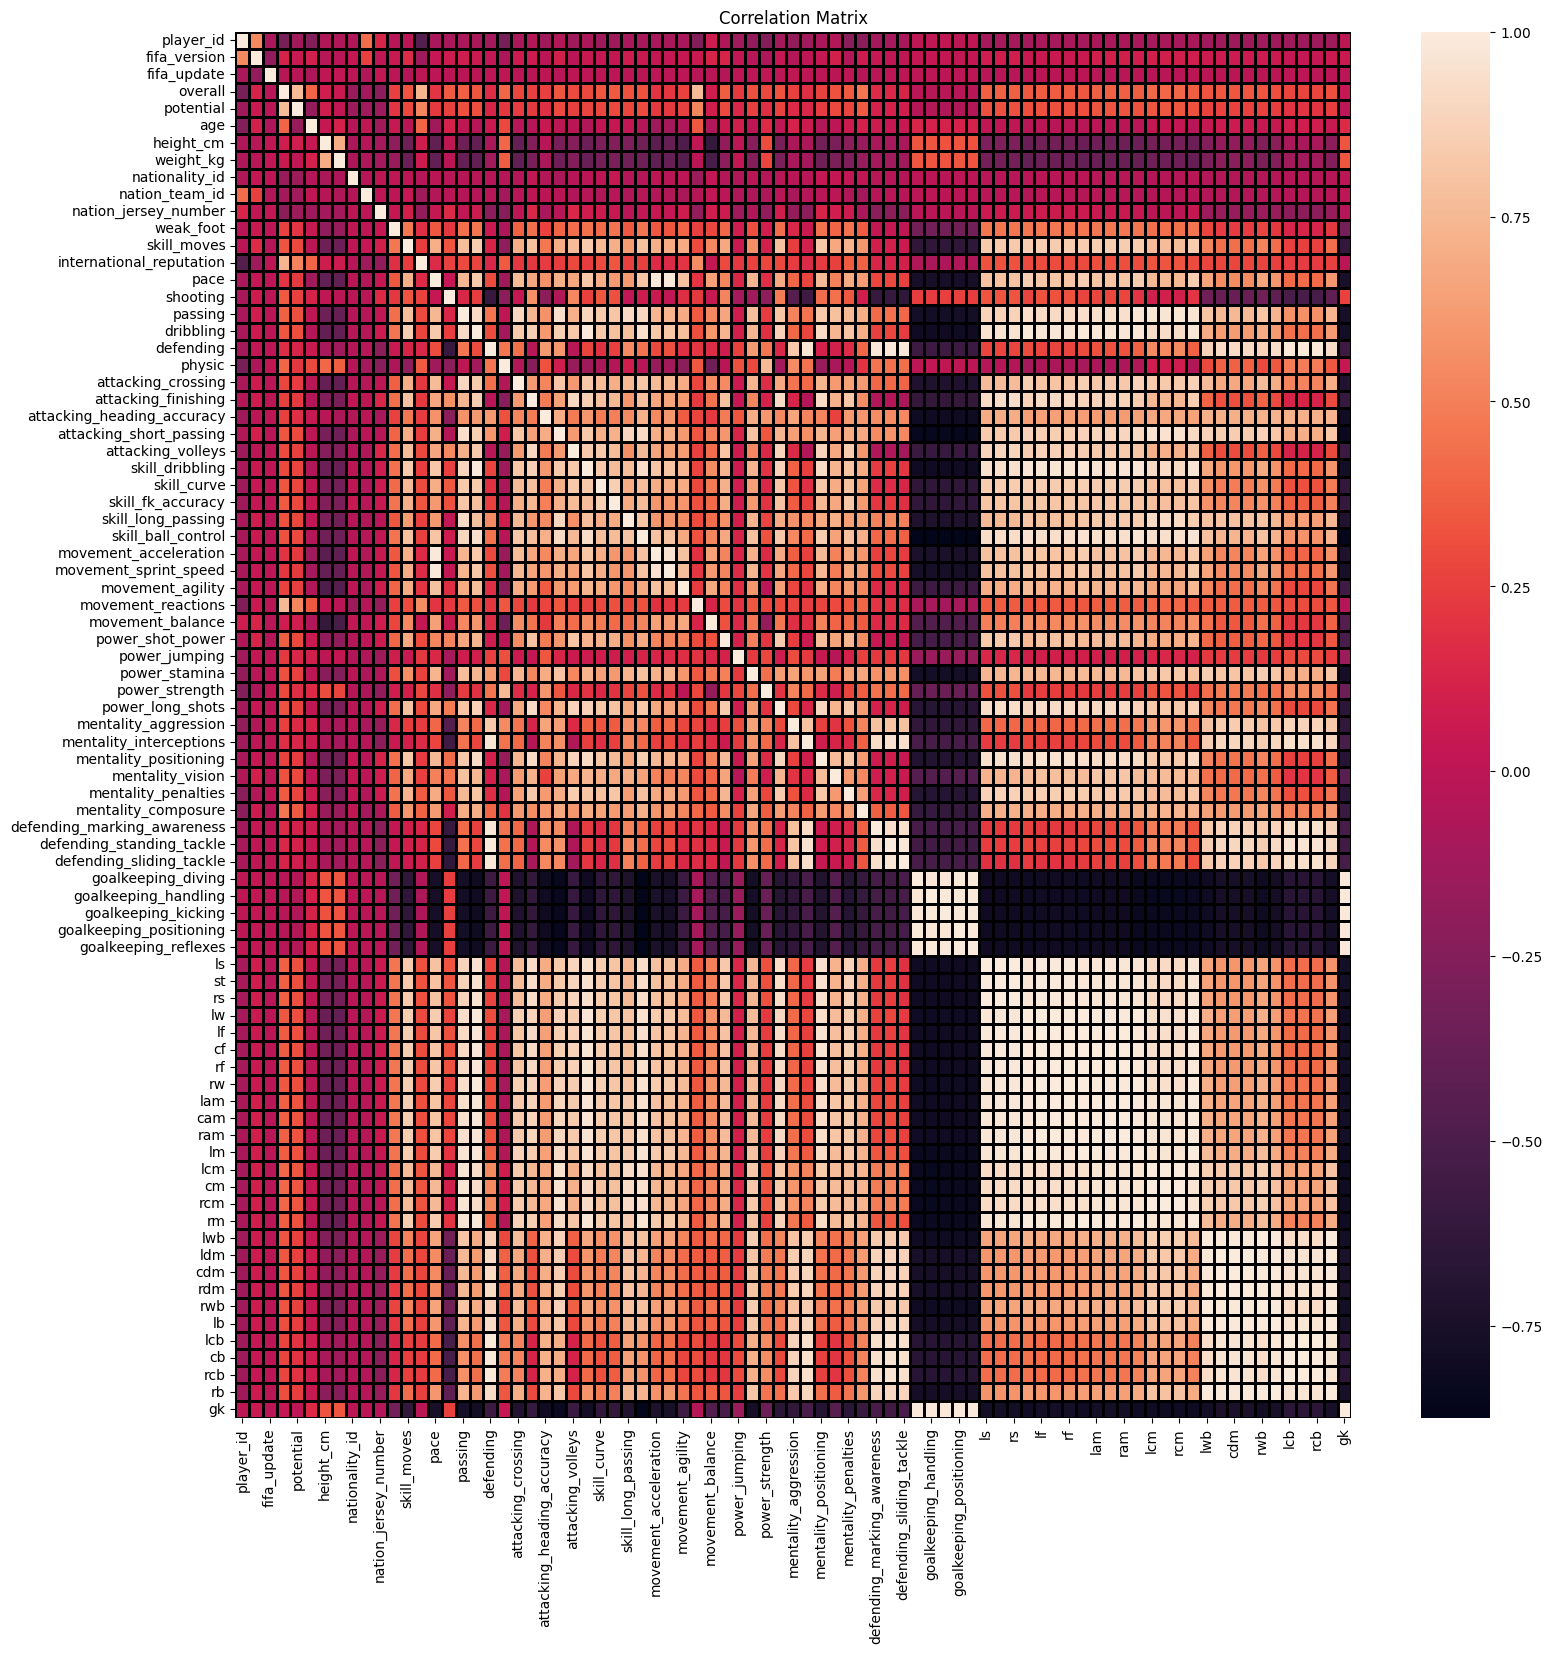

In [75]:
# making a heatmap of the correlation matrix
df2 = df.copy()
# dropping the categorical columns
try:
       df2 = df2.drop(columns = ['short_name', 'player_positions', 'league_name', 'club_name',
              'club_position', 'nationality_name', 'preferred_foot', 'work_rate',
              'body_type'])
except:
       df2 = df2.drop(columns = ['short_name', 'player_positions', 'nationality_name', 'nation_position',
              'preferred_foot', 'work_rate', 'body_type'])

plt.figure(figsize=(18,18))
sns.heatmap(df2.corr(), cbar = True, linewidths=1, linecolor='black')
# sns.heatmap(df2.corr(), annot= False, cmap='jet')
plt.title('Correlation Matrix')
plt.show()

In [76]:
# 'fifa_update', 'fifa_version': Both of these columns are not useful, as they are not related any other column
print(df['fifa_update'].unique())
df = df.drop(columns = ['fifa_update'])
# but we won't drop fifa_version because we use it for analysis
# Notice fifa_update only has value 2 in case of male

[ 9  8  7  6  5  4  3  2  1 69 68 67 66 65 64 63 62 61 60 59 58 57 56 55
 54 53 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10 75 74 73
 72 71 70 84 83 82 81 80 79 78 77 76 99 98 97 96 95 94 93 92 91 90 89 88
 87 86 85]


# Preprocessing

In [77]:
df.select_dtypes(include = 'object').columns

Index(['short_name', 'player_positions', 'nationality_name', 'nation_position',
       'preferred_foot', 'work_rate', 'body_type'],
      dtype='object')

In [78]:
print(df['work_rate'].value_counts(),"\n\n")

# get sum of work_rate counts that start with High, Medium, Low
print("Attack ", end ="")
print(df['work_rate'].str.split('/').str[0].value_counts(),"\n\n")
print("Defend ", end ="")
print(df['work_rate'].str.split('/').str[1].value_counts())


work_rate
Medium/Medium    91739
High/Medium      37543
Medium/High      15987
High/High         9994
High/Low          8198
Medium/Low        5816
Low/High          4318
Low/Medium        3747
Low/Low             15
Name: count, dtype: int64 


Attack work_rate
Medium    113542
High       55735
Low         8080
Name: count, dtype: int64 


Defend work_rate
Medium    133029
High       30299
Low        14029
Name: count, dtype: int64


In [79]:
# We can split work rate into 2 columns: Attack and Defend
df['work_rate_attack'] = df['work_rate'].str.split('/').str[0]
df['work_rate_defend'] = df['work_rate'].str.split('/').str[1]

# Drop the original column
df = df.drop(columns = ['work_rate'])

# Get values of the new columns to make sure they are correct
print(df['work_rate_attack'].value_counts(), "\n")
print(df['work_rate_defend'].value_counts())




work_rate_attack
Medium    113542
High       55735
Low         8080
Name: count, dtype: int64 

work_rate_defend
Medium    133029
High       30299
Low        14029
Name: count, dtype: int64


In [80]:
# Now we can one hot encode these columns
# Note that splitting them then one hot encoding them is better than one hot encoding the original column
# this produces 6 columns instead of 9 (linearly dependent (2n) instead of exponentially dependent (n^2))
df = pd.get_dummies(df, columns = ['work_rate_attack', 'work_rate_defend'])
# The types are bool, we can convert them to int
df['work_rate_attack_Low'] = df['work_rate_attack_Low'].astype(int)
df['work_rate_attack_Medium'] = df['work_rate_attack_Medium'].astype(int)
df['work_rate_attack_High'] = df['work_rate_attack_High'].astype(int)
df['work_rate_defend_Low'] = df['work_rate_defend_Low'].astype(int)
df['work_rate_defend_Medium'] = df['work_rate_defend_Medium'].astype(int)
df['work_rate_defend_High'] = df['work_rate_defend_High'].astype(int)




In [81]:
len(df.columns)
# The length of the columns has increased by 5 (6-1)

92

In [82]:
print("Before:", df['body_type'].value_counts())
# No need to look at height here, as there is another column for it
df['body_type'] = df['body_type'].str.split().str[0]
print("\n\nAfter:", df['body_type'].value_counts())

Before: body_type
Normal (170-)       73183
Normal (170-185)    41090
Lean (170-185)      20083
Lean (170-)         19747
Stocky (170-)       11438
Stocky (170-185)    10266
Lean (185+)           820
Unique                496
Normal (185+)         234
Name: count, dtype: int64


After: body_type
Normal    114507
Lean       40650
Stocky     21704
Unique       496
Name: count, dtype: int64


In [83]:
# One hot encode
df = pd.get_dummies(df, columns = ['body_type'])
df['body_type_Lean'] = df['body_type_Lean'].astype(int)
df['body_type_Normal'] = df['body_type_Normal'].astype(int)
df['body_type_Stocky'] = df['body_type_Stocky'].astype(int)
df['body_type_Unique'] = df['body_type_Unique'].astype(int)


In [84]:
# Change value of left to 0 and right to 1
print(df['preferred_foot'].value_counts(), "\n")
df['preferred_foot'] = df['preferred_foot'].apply(lambda x: 0 if x == 'Left' else 1)
print(df['preferred_foot'].value_counts())

preferred_foot
Right    143867
Left      33490
Name: count, dtype: int64 

preferred_foot
1    143867
0     33490
Name: count, dtype: int64


3ayzeen nb2a n3ml type encoding to some feature

In [85]:
df.describe()

,player_id,fifa_version,overall,potential,age,height_cm,weight_kg,nationality_id,nation_team_id,nation_jersey_number,...,work_rate_attack_High,work_rate_attack_Low,work_rate_attack_Medium,work_rate_defend_High,work_rate_defend_Low,work_rate_defend_Medium,body_type_Lean,body_type_Normal,body_type_Stocky,body_type_Unique
count,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,...,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000,177357.000000
mean,234079.395327,19.138478,76.334095,79.689620,26.042705,168.755403,61.221937,70.460286,113079.561686,12.334202,...,0.314253,0.045558,0.640189,0.170836,0.079100,0.750063,0.229199,0.645630,0.122375,0.002797
std,9832.056874,2.003109,5.677790,5.423528,3.886067,6.252827,5.567843,57.876415,335.711789,7.179929,...,0.464219,0.208525,0.479946,0.376367,0.269896,0.432977,0.420319,0.478323,0.327719,0.052809
min,226177.000000,16.000000,49.000000,49.000000,16.000000,150.000000,45.000000,7.000000,112998.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,227115.000000,17.000000,72.000000,76.000000,23.000000,164.000000,57.000000,27.000000,113001.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,227462.000000,19.000000,76.000000,80.000000,26.000000,170.000000,61.000000,46.000000,113006.000000,12.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,240711.000000,21.000000,80.000000,83.000000,29.000000,173.000000,65.000000,95.000000,113010.000000,18.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,272534.000000,23.000000,93.000000,95.000000,41.000000,188.000000,84.000000,198.000000,116428.000000,98.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177357 entries, 1 to 181360
Data columns (total 95 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   player_id                    177357 non-null  int64  
 1   fifa_version                 177357 non-null  int64  
 2   short_name                   177357 non-null  object 
 3   player_positions             177357 non-null  object 
 4   overall                      177357 non-null  int64  
 5   potential                    177357 non-null  int64  
 6   age                          177357 non-null  int64  
 7   height_cm                    177357 non-null  int64  
 8   weight_kg                    177357 non-null  int64  
 9   nationality_id               177357 non-null  int64  
 10  nationality_name             177357 non-null  object 
 11  nation_team_id               177357 non-null  float64
 12  nation_position              177357 non-null  object 
 13  nati

In [87]:
# get type of first 50 columns
df.dtypes[:50]

player_id                       int64
fifa_version                    int64
short_name                     object
player_positions               object
overall                         int64
potential                       int64
age                             int64
height_cm                       int64
weight_kg                       int64
nationality_id                  int64
nationality_name               object
nation_team_id                float64
nation_position                object
nation_jersey_number          float64
preferred_foot                  int64
weak_foot                       int64
skill_moves                     int64
international_reputation        int64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_he

In [88]:
df.dtypes[49:]

mentality_composure            float64
defending_marking_awareness      int64
defending_standing_tackle        int64
defending_sliding_tackle         int64
goalkeeping_diving               int64
goalkeeping_handling             int64
goalkeeping_kicking              int64
goalkeeping_positioning          int64
goalkeeping_reflexes             int64
ls                               int64
st                               int64
rs                               int64
lw                               int64
lf                               int64
cf                               int64
rf                               int64
rw                               int64
lam                              int64
cam                              int64
ram                              int64
lm                               int64
lcm                              int64
cm                               int64
rcm                              int64
rm                               int64
lwb                      

In [89]:
len(df2.columns)

81

In [90]:
# Saving the dataset
df.to_csv('Data/Preprocessed/Clean_'+dataset+'.csv', index = False)